# Lexical Frequency Incremental
Incremental models investigating the effect of spoken frequency, using orthographic frequency norms. </br>
Other word norms and a binary regressor coding for the presence of speech in the stimulus are added as covariates.

In [2]:
%load_ext autoreload
%autoreload 2
from tools.create import create_incremental_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor, plot_metrics, 
                       plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [3]:
api = Neuroscout()

## Define predictors and confounds

In [4]:
predictor_sets = [
    ['subtlexusfrequency_Lg10WF', 'speech'],
    ['massiveauditorylexicaldecision_PhonLev', 'text_length'],
    ['massiveauditorylexicaldecision_NumSylls', 'massiveauditorylexicaldecision_NumPhones', 'massiveauditorylexicaldecision_Duration', 'concreteness_Conc.M']
]
predictors = [item for sublist in predictor_sets for item in sublist]
transform_variables = list(set(predictors) - set(['speech']))

In [5]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

## Create models

In [6]:
transformations = [
    {"Name": "Scale", "Demean": True, "Rescale": True, "ReplaceNA": "after", "Input": [p],"Output": [p]} 
    for p in transform_variables
    ]

In [6]:
incremental_models = create_incremental_models(predictor_sets, confounds,
                                               transformations=transformations, 
                                               include_single_pred=True)

In [7]:
filename = Path('models') / 'lexical_frequency_incremental.json'

In [25]:
dump_collection(incremental_models, filename)

In [8]:
incremental_models = load_collection(filename)

## Generate reports

In [8]:
for (pred, dataset, task), model in flatten_collection(single_models):
    model.generate_report(run_id=model.runs[0])

In [10]:
for m in incremental_models.keys():
    incremental_models[m]['Budapest']['movie'].plot_report()

## Inspect regressors

In [ ]:
df = _extract_regressors(incremental_models)

In [ ]:
plot_regressor(plot_type='distribution', df=df, 
               split_by='hue', color=None, aspect=3, hist=None, rug=True)

In [ ]:
plot_regressor(plot_type='timeseries', df=df, predictors=['speech'],
               split_by='row', height=1.2, aspect=10)

In [18]:
agg_df = compute_metrics(df=df, aggfunc=[np.mean, np.std, np.var])

In [ ]:
plot_metrics(agg_df, metrics=['mean', 'std', 'var'], 
             sns_function='barplot', height=3, aspect=1)

## Compile models

In [27]:
for (pred, dataset, task), model in flatten_collection(incremental_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'Status: {model.status} for {pred}, {dataset}, {task}')

Status: PASSED for subtlexusfrequency_Lg10WF+speech, Budapest, movie
Status: PASSED for subtlexusfrequency_Lg10WF+speech, HealthyBrainNetwork, movieDM
Status: PASSED for subtlexusfrequency_Lg10WF+speech, LearningTemporalStructure, movie
Status: PASSED for subtlexusfrequency_Lg10WF+speech, Life, life
Status: PASSED for subtlexusfrequency_Lg10WF+speech, ParanoiaStory, story
Status: PASSED for subtlexusfrequency_Lg10WF+speech, Raiders, raiders
Status: PASSED for subtlexusfrequency_Lg10WF+speech, SchematicNarrative, perception
Status: PASSED for subtlexusfrequency_Lg10WF+speech, Sherlock, sherlockPart1
Status: PASSED for subtlexusfrequency_Lg10WF+speech, SherlockMerlin, MerlinMovie
Status: PASSED for subtlexusfrequency_Lg10WF+speech, SherlockMerlin, SherlockMovie
Status: PASSED for subtlexusfrequency_Lg10WF+speech+massiveauditorylexicaldecision_PhonLev+text_length, Budapest, movie
Status: PASSED for subtlexusfrequency_Lg10WF+speech+massiveauditorylexicaldecision_PhonLev+text_length, Health

In [28]:
print(' '.join([m[1].hash_id for m in flatten_collection(incremental_models)]))

9BqG5 AqQxk wkV5V 9L2kY 97pXv wjNOy Ma40P wkVjV M4jV2 A25Pv MD1ad Mv3E7 wl8zX wy2a0 MRabg MpD1K Mm3dx wgyQR MPqOE A6oqQ wQDpd AxBPb wK2z5 AYyjb 9Bq37 M37W8 wJ3rm MD1B4 wQDXz w0gXN


## Results

In [9]:
flat_models = flatten_collection(incremental_models)

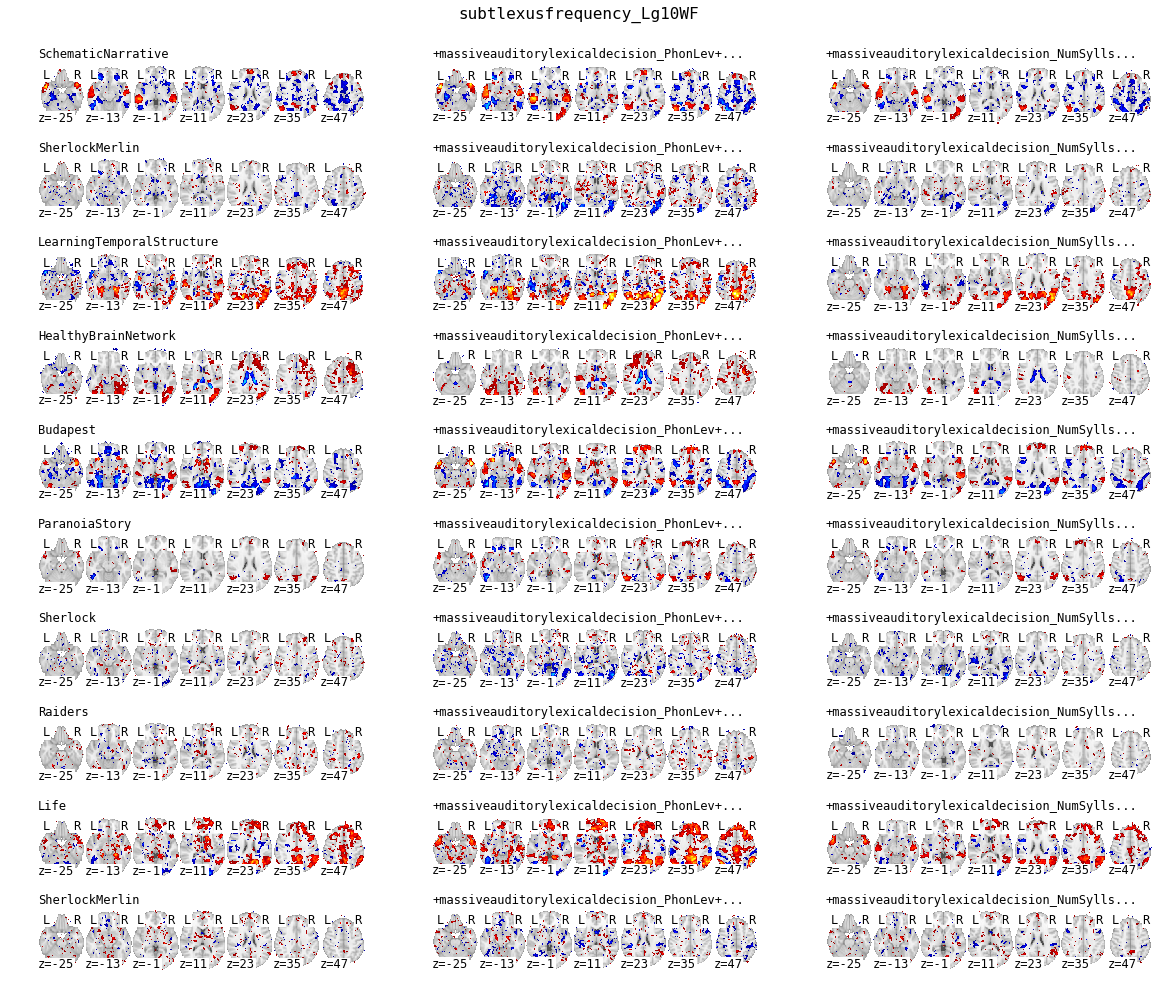

In [10]:
plt.rcParams.update({'font.family': 'monospace'})
plot_analysis_grid(flat_models,
                   contrasts='subtlexusfrequency_Lg10WF',
                   vmax=10, display_mode='z', figsize=(20,17),
                   threshold=1.96, colorbar=False)

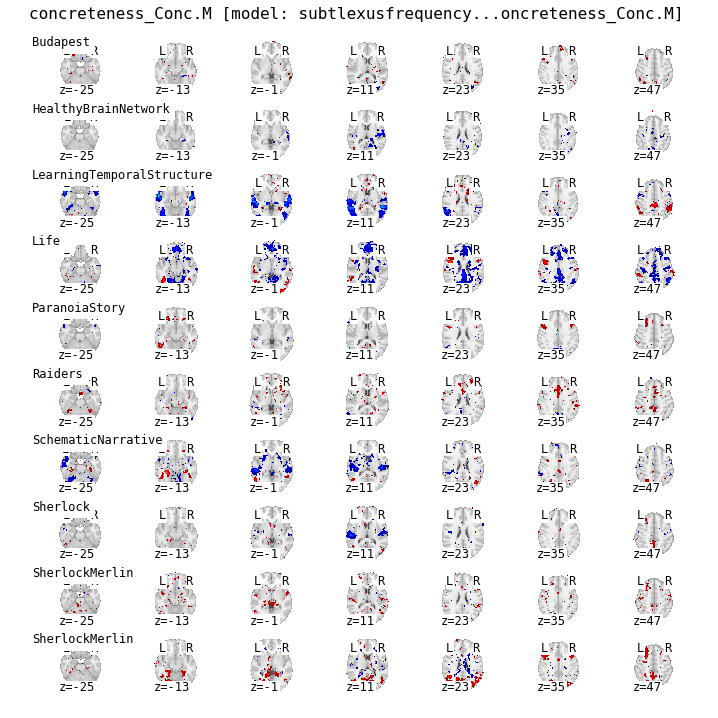

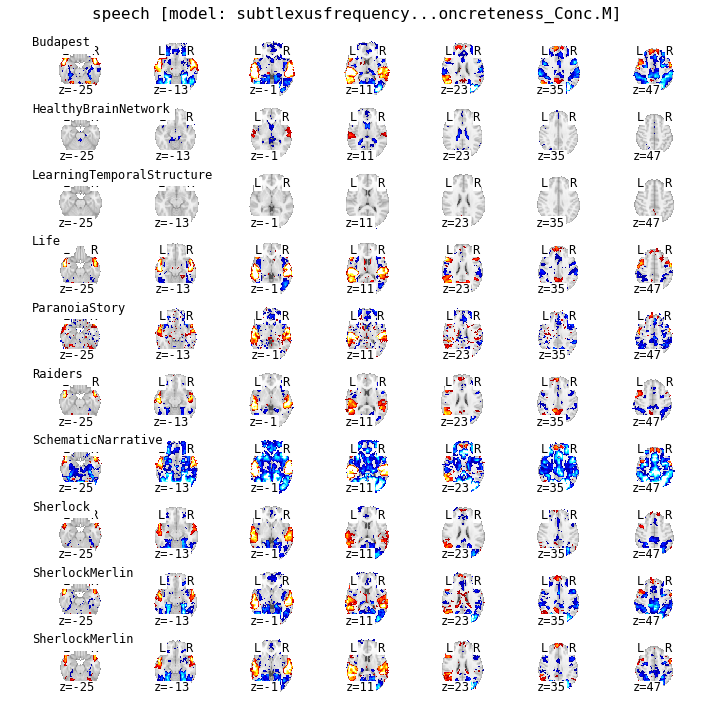

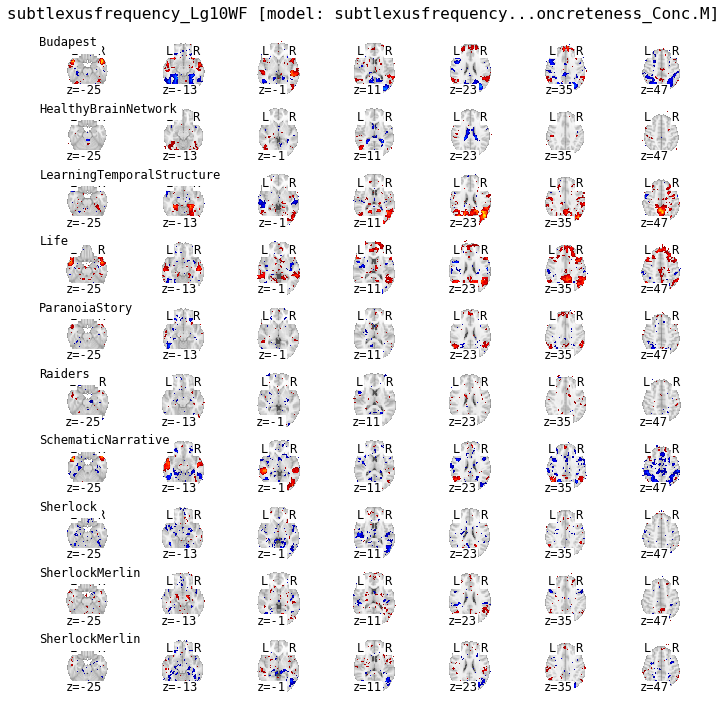

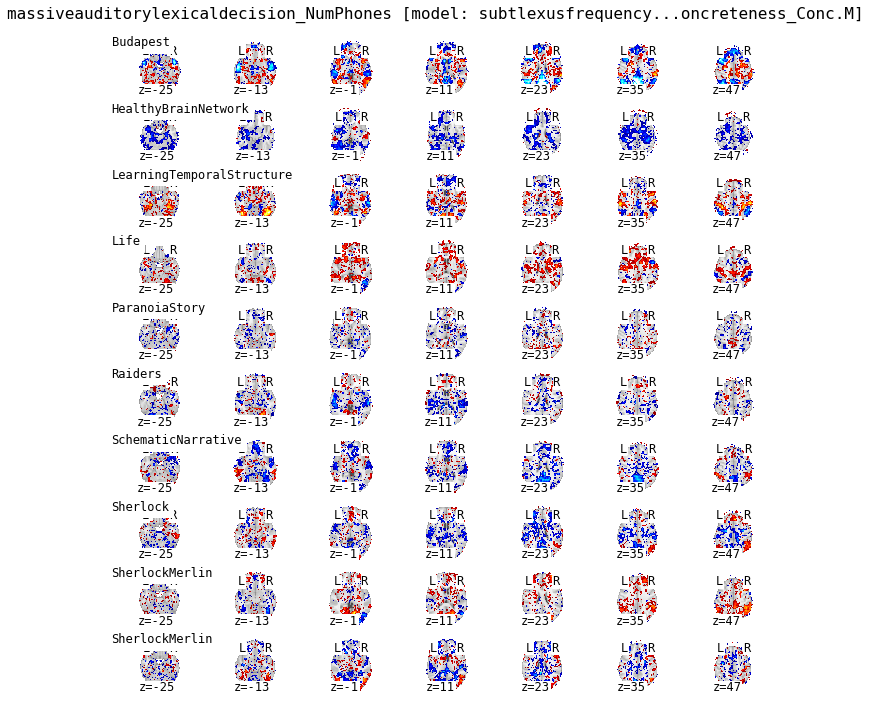

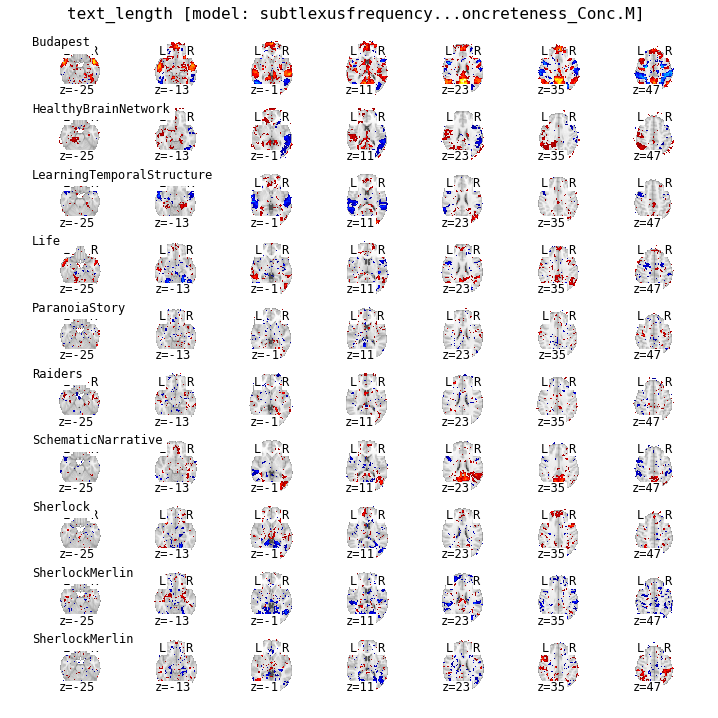

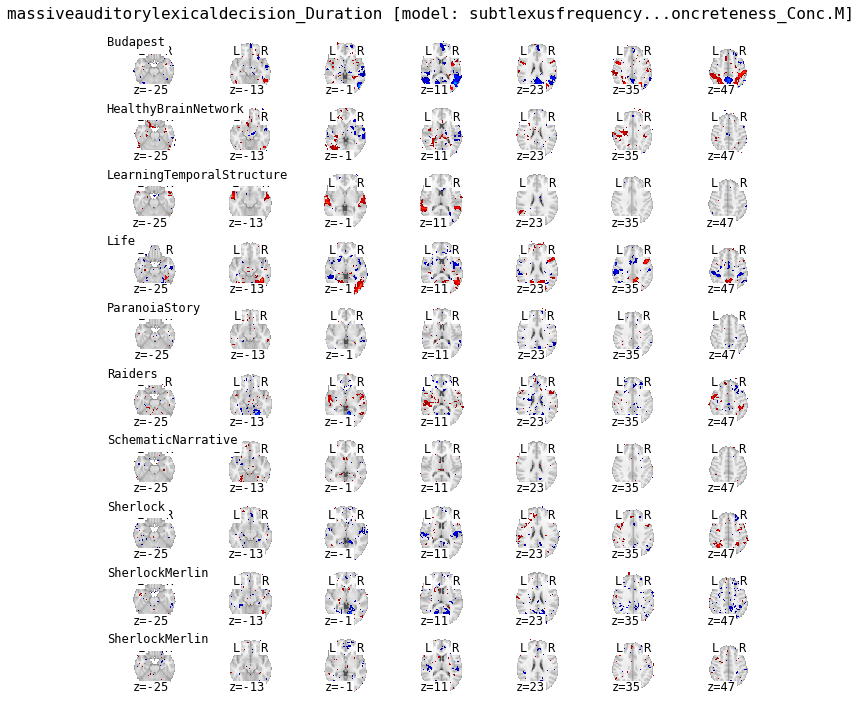

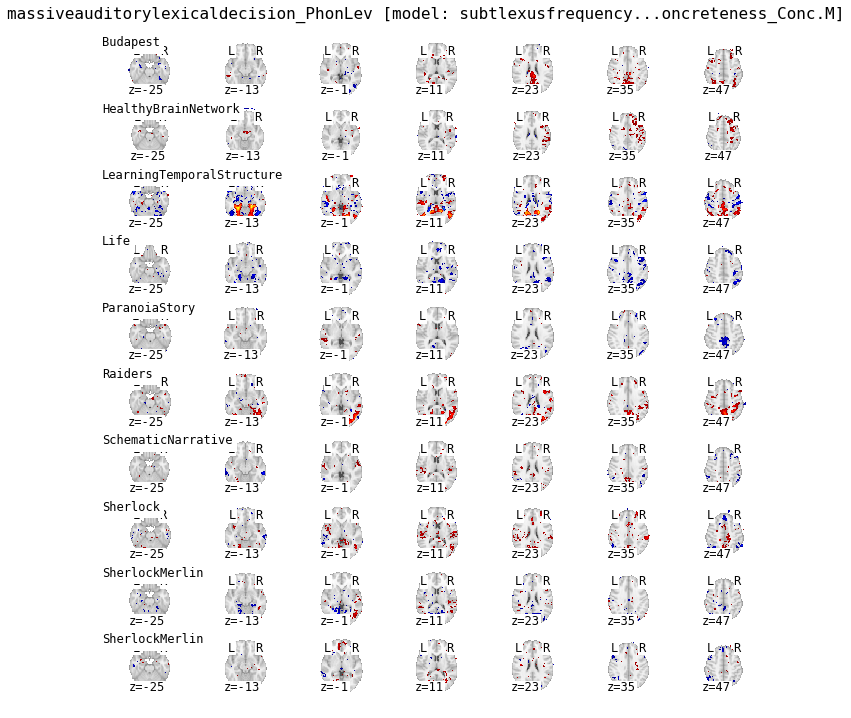

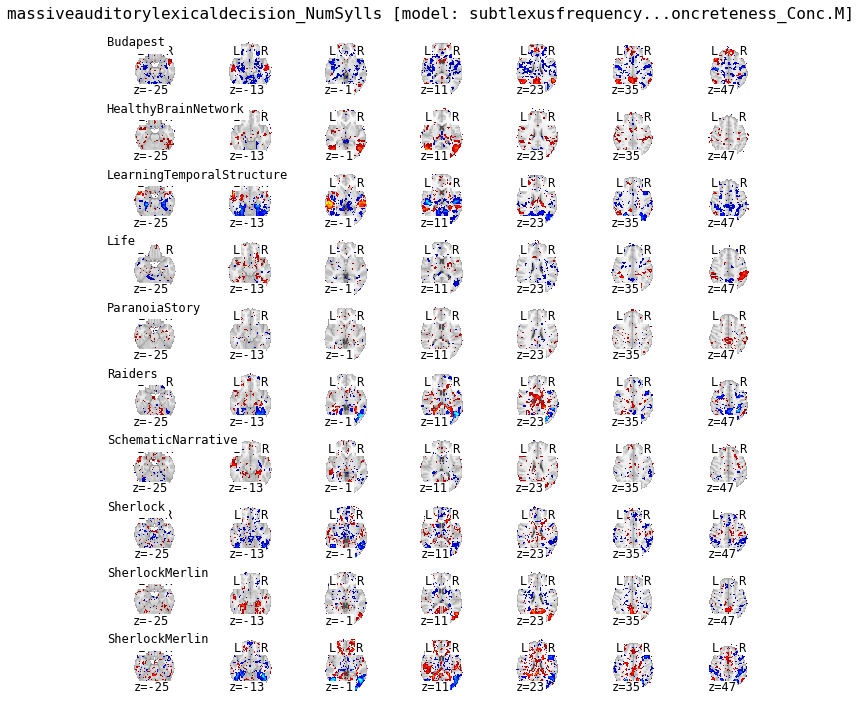

In [11]:
plot_contrast_by_analysis(flat_models,
                          models = ['subtlexusfrequency_Lg10WF+speech+massiveauditorylexicaldecision_PhonLev+text_length+massiveauditorylexicaldecision_NumSylls+massiveauditorylexicaldecision_NumPhones+massiveauditorylexicaldecision_Duration+concreteness_Conc.M'],
                          vmax=10, display_mode='z', figsize=(12,12),
                          threshold=1.96, colorbar=False)